In [94]:
from scipy.optimize import curve_fit
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import numpy as np
with open('andlargesize/sizes.pickle', 'rb') as f:
        sizes = pickle.load(f)
size_to_index_dict = {size: index for index, size in enumerate(sizes)}
print("sizes: ", sizes)

with open('andlargesize/medians_mutations.pickle', 'rb') as f:
        medians_mutations = pickle.load(f)
print("median mutations: ", medians_mutations)

with open('andlargesize/means_mutations.pickle', 'rb') as f:
        means_mutations = pickle.load(f)
print("means mutations: ", means_mutations)

with open('andlargesize/stds_mutations.pickle', 'rb') as f:
        stds_mutations = pickle.load(f)
print("stds mutations: ", stds_mutations)

with open('andlargesize/medians_times.pickle', 'rb') as f:
        medians_times = pickle.load(f)
print("median times: ", medians_times)

with open('andlargesize/means_times.pickle', 'rb') as f:
        means_times = pickle.load(f)
print("means times: ", means_times)

with open('andlargesize/stds_times.pickle', 'rb') as f:
        stds_times = pickle.load(f)
print("stds times: ", stds_times)


sizes:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 40, 60, 80, 100, 200, 300, 400, 500, 1000, 1500, 2000]
median mutations:  [21787.5, 4376.0, 2913.0, 75.5, 89.5, 120.0, 97.0, 87.0, 79.0, 91.0, 110.5, 115.5, 119.5, 185.0, 260.5, 376.0, 511.5, 561.5, 1403.5, 2136.5, 2517.5, 3399.5, 5984.5, 9920.5, 13437.0]
means mutations:  [30382.91, 12461.78, 10126.54, 7559.16, 5874.67, 6451.88, 3941.96, 5570.43, 3511.64, 3928.27, 3156.95, 4291.97, 2544.15, 2081.41, 2595.04, 843.71, 949.41, 2158.77, 3796.23, 2239.31, 8696.0, 8582.05, 7445.54, 12079.97, 16374.18]
stds mutations:  [29846.891908570644, 22020.514385717695, 15413.874600125693, 13819.64316595765, 12572.271840884607, 11178.6844317925, 9979.503401392276, 12448.79459165023, 9562.839748233786, 11776.258394630275, 7777.523458498856, 11449.135118824479, 6796.937962604925, 7003.065060521714, 7975.939829161201, 3420.067172717518, 2709.069637698522, 11233.345898578038, 16387.323967539665, 1385.218926343414, 42462.798062539405, 46742.6064368205

In [95]:
size_to_index_dict = {size: index for index, size in enumerate(sizes)}

[ 6.59692691 -5.16249743]
[ 0.07836786 53.12699152]
r^2 =  0.99788764760732


TypeError: plot() got an unexpected keyword argument 'x'

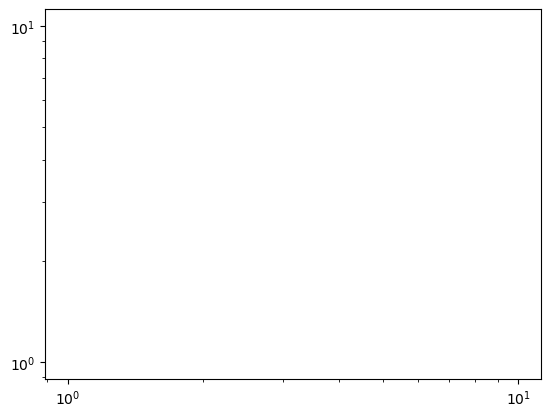

In [98]:
# Now this is what i need to fit a powerlaw plot
def power_law(x, a, b):
    return a*np.power(x, 1) + b

pars_mutations, cov_mutations = curve_fit(f=power_law, xdata=sizes[size_to_index_dict[10]:], ydata=medians_mutations[size_to_index_dict[10]:], p0=[0,0], bounds=(-np.inf, np.inf))
print(pars_mutations)
perr_mutations = np.sqrt(np.diag(cov_mutations))
print(perr_mutations)
print("r^2 = ", metrics.r2_score(medians_mutations[size_to_index_dict[10]:], power_law(sizes[size_to_index_dict[10]:], *pars_mutations)))
fig, ax = plt.subplots(1, 1)
ax.loglog(sizes, medians_mutations,  label="Median Mutations Until Fixation")
ax.loglog(sizes[size_to_index_dict[10]:], power_law(sizes[size_to_index_dict[10]:], *pars_mutations), label="Power Law Fit: " +str(pars_mutations[0])[:5] +" * size^" +str(pars_mutations[1])[:5])
ax.legend(bbox_to_anchor=(0.8, 1.1))
fig.savefig('medianMutationsTillFixationAndWithFittedPlot.png', dpi=1200)
plt.show()

[2.10528848e-06 1.42721219e-03]
[-2.99102168e-06  3.65171575e-02]
r^2 =  0.11860313295734659


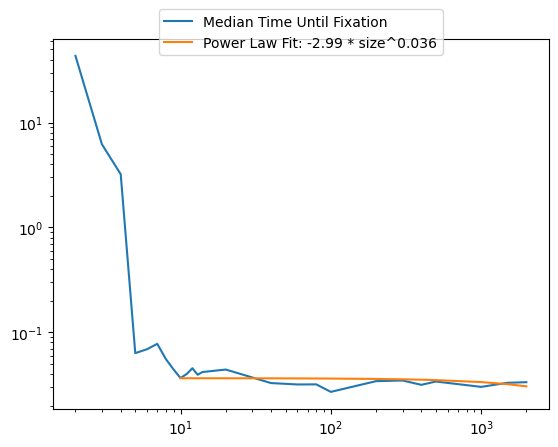

In [97]:
pars_time, cov_times = curve_fit(f=power_law, xdata=sizes[size_to_index_dict[10]:], ydata=medians_times[size_to_index_dict[10]:], p0=[0,0], bounds=(-np.inf, np.inf))
perr_times = np.sqrt(np.diag(cov_times))
print(perr_times)
fig, ax = plt.subplots(1, 1)
print(pars_time)
print("r^2 = ", metrics.r2_score(medians_times[size_to_index_dict[10]:], power_law(sizes[size_to_index_dict[10]:], *pars_time)))
ax.loglog(sizes, medians_times, label="Median Time Until Fixation")
ax.loglog(sizes[size_to_index_dict[10]:], power_law(sizes[size_to_index_dict[10]:], *pars_time), label="Power Law Fit: " +str(pars_time[0])[:5] +" * size^" +str(pars_time[1])[:5])
ax.legend(bbox_to_anchor=(0.8, 1.1))
fig.savefig('medianTimeTillFixationAndWithFittedPlot.png', dpi=1200)
plt.show()